In [1]:
%pylab inline
import pickle
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def power_law(log_distance,exponent,normalization):
    return exponent*log_distance+normalization

In [3]:
#-------------------------input paramaters--------------------------------------------
redshift=8.0
stellar_mass_cut=9.5
#--------------- spatial range and resolution in primary output file
log_r_min=-3     
log_r_max=2
no_of_bins=100
log_r_min_for_fitting=-1
redshift_range=[8.0,9.0,10.0]  #------------iterate over these redshifts
stellar_mass_cut_range=[7.5,8.0,8.5,9.0,9.5,10.0]   #------------iterate over these stellar mass cuts
colors=['blue','red','green','orange','cyan','pink']

/home/akbhowmi/miniconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/akbhowmi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater


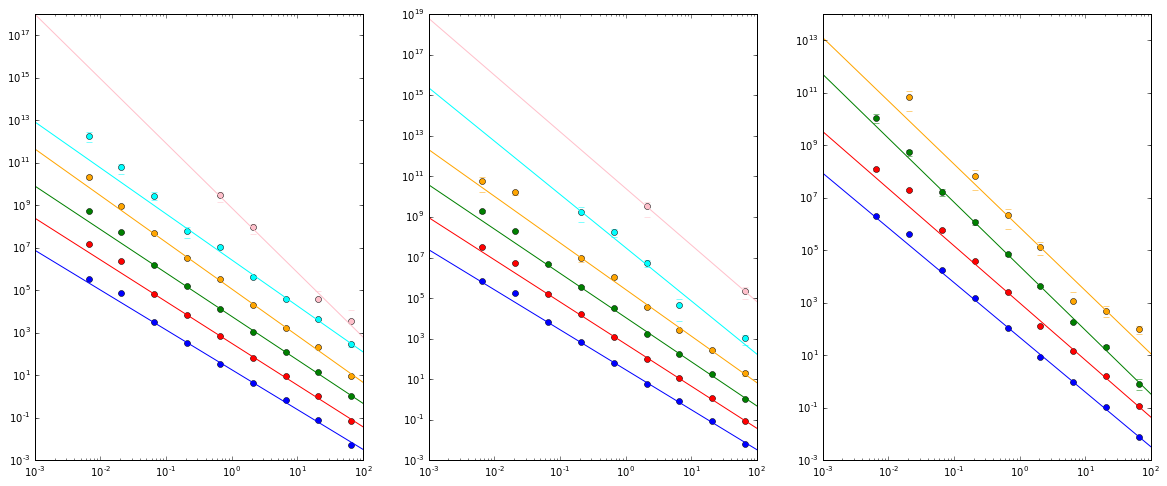

In [4]:
#--------------Peforming the power-law fits and plotting the results-------------------------------

no_of_redshifts=len(redshift_range)
f,ax=plt.subplots(1,no_of_redshifts,figsize=(20,8))

j=0
for redshift in redshift_range:
    i=0
    if (no_of_redshifts==1):
        obj=ax
    else:
        obj=ax[j]
    for stellar_mass_cut,col in zip(stellar_mass_cut_range,colors):

        try:
        
            r,xi,dxi,N=pickle.load(open('./galaxy_correlation_functions/xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))
            mask=(xi>0)&(r>10**log_r_min_for_fitting)
            fit=curve_fit(power_law,numpy.log10(r[mask]),numpy.log10(xi[mask]))
            fitted_exponent=fit[0][0]
            fitted_normalization=fit[0][1]
            fitted_exponent_error, fitted_normalization_error=numpy.sqrt(numpy.diag(fit[1]))
            r_space_fit=numpy.logspace(log_r_min,log_r_max,no_of_bins)
            xi_space_fit=10**power_law(numpy.log10(r_space_fit),fitted_exponent,fitted_normalization)


            offset_for_plot=10**i

            obj.errorbar(r,xi*offset_for_plot,dxi*offset_for_plot,color=col,marker='o',linewidth=0)
            obj.plot(r_space_fit,xi_space_fit*offset_for_plot,color=col)
            obj.set_xscale('log')
            obj.set_yscale('log')
            
            pickle.dump([r_space_fit,xi_space_fit],open('./galaxy_correlation_functions_power_law_models/power_law_modeling_xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut),'w'))
            
            pickle.dump([fitted_exponent,fitted_normalization,fitted_exponent_error,fitted_normalization_error],open('./galaxy_correlation_functions_power_law_models/power_law_modeling_paramaters_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut),'w'))

            i+=1
        except:
            aaa=1
    j+=1
        

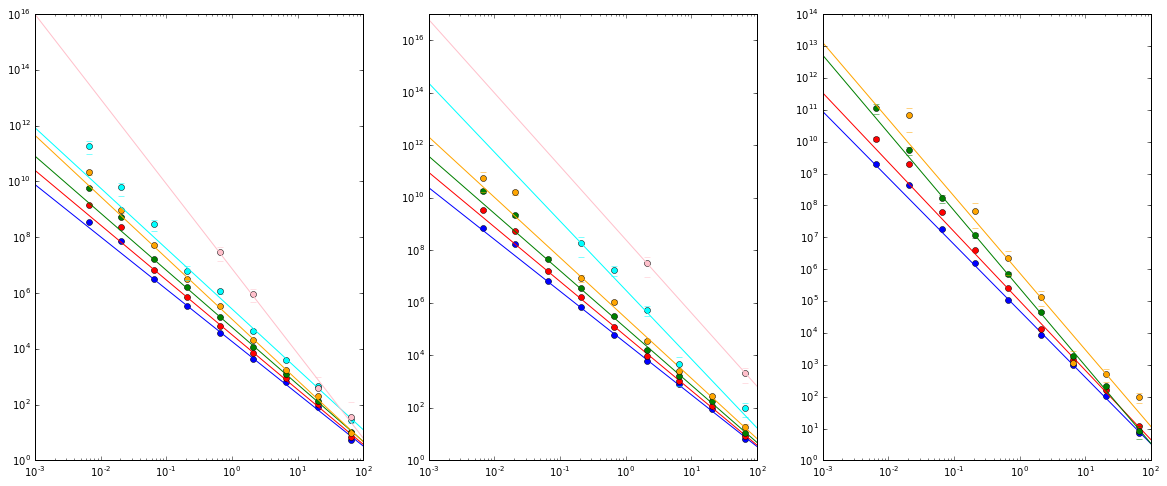

In [9]:
#--------------Plotting the output files for a double check------------------------------

no_of_redshifts=len(redshift_range)
f,ax=plt.subplots(1,no_of_redshifts,figsize=(20,8))

j=0
for redshift in redshift_range:
    i=0
    if (no_of_redshifts==1):
        obj=ax
    else:
        obj=ax[j]
    for stellar_mass_cut,col in zip(stellar_mass_cut_range,colors):

        try:
            r,xi,dxi,N=pickle.load(open('./galaxy_correlation_functions/xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))

            r_space_fit,xi_space_fit=pickle.load(open('./galaxy_correlation_functions_power_law_models/power_law_modeling_xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))
            
            fitted_exponent,fitted_normalization,fitted_exponent_error,fitted_normalization_error=pickle.load(open('./galaxy_correlation_functions_power_law_models/power_law_modeling_paramaters_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))

            obj.errorbar(r,xi*offset_for_plot,dxi*offset_for_plot,color=col,marker='o',linewidth=0)
            obj.plot(r_space_fit,xi_space_fit*offset_for_plot,color=col)
            obj.set_xscale('log')
            obj.set_yscale('log')
            i+=1
        except:
            aaa=1
    j+=1
        

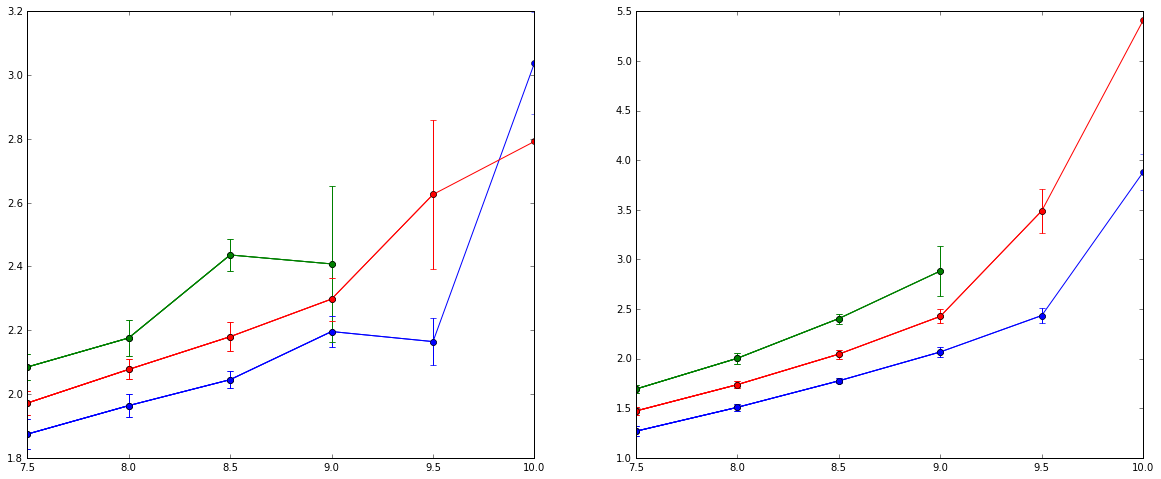

In [17]:
#--------------Plotting the power-law parameters------------------------------

no_of_redshifts=len(redshift_range)
f,ax=plt.subplots(1,2,figsize=(20,8))

j=0
for redshift,col in zip(redshift_range,colors):
    fitted_exponent_space=[]
    fitted_normalization_space=[]
    fitted_exponent_error_space=[]
    fitted_normalization_error_space=[]
    
    fitted_stellar_mass_cut_space=[]
    
    i=0

    obj=ax

    for stellar_mass_cut in stellar_mass_cut_range:

        try:
            r,xi,dxi,N=pickle.load(open('./galaxy_correlation_functions/xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))

            r_space_fit,xi_space_fit=pickle.load(open('./galaxy_correlation_functions_power_law_models/power_law_modeling_xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))
            
            fitted_exponent,fitted_normalization,fitted_exponent_error,fitted_normalization_error=pickle.load(open('./galaxy_correlation_functions_power_law_models/power_law_modeling_paramaters_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(redshift,stellar_mass_cut)))
            fitted_exponent_space.append(-fitted_exponent)
            fitted_exponent_error_space.append(fitted_exponent_error)
            
            fitted_normalization_space.append(fitted_normalization)
            fitted_normalization_error_space.append(fitted_normalization_error)
            
            fitted_stellar_mass_cut_space.append(stellar_mass_cut)

            i+=1
        except:
            aaa=1
        ax[0].errorbar(fitted_stellar_mass_cut_space,fitted_exponent_space,fitted_exponent_error_space,color=col,marker='o')
        ax[1].errorbar(fitted_stellar_mass_cut_space,fitted_normalization_space,fitted_normalization_error_space,color=col,marker='o')
    j+=1
        